In [1]:
import pyforest
import subprocess
# get the path to the root of the repository
root_path = subprocess.check_output(['git', 'rev-parse', '--show-toplevel']).decode('utf-8').strip()
# set the working directory to the root of the repository
os.chdir(root_path)
# print the current working directory
print(os.getcwd())

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/data0/work/guozhonghao/PD_RNA_seq


# C. PCA plot

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Axes: xlabel='PC1', ylabel='PC2'>

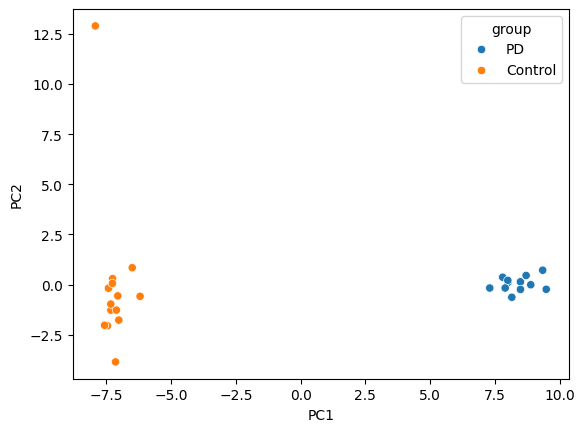

In [9]:
# import every txt in results/rMATs/sig and merge them
dir = 'results/rMATs/sig'
files = os.listdir(dir)

dfs = []
for f in files:
    if f.endswith('.txt'):
        df = pd.read_csv(f'{dir}/{f}', sep='\t')
        # df['file'] = f.split('.')[0]
        dfs.append(df)
df = pd.concat(dfs)
# delete every column except file and IncLevel1 and IncLevel2
df_x = df['IncLevel1'].str.split(',', expand=True).add_prefix('sample').add_suffix('_1').join(df['IncLevel2'].str.split(',', expand=True).add_prefix('sample').add_suffix('_2'))
df_x = df_x.replace('NA', np.nan).dropna().transpose()
# df_y is repetition of number of IncLevel1 of 1 and repetition number of IncLevel2 of 2
df_y = pd.Series(['PD']*12 + ['Control']*14)

PCA(n_components=2)
reduced = PCA(n_components=2).fit_transform(df_x)
PC1 = reduced[:,0]
PC2 = reduced[:,1]
# join PC1 and PC2 with df_y
df_plot = pd.DataFrame({'PC1': PC1, 'PC2': PC2, 'group': df_y})
sns.scatterplot(data=df_plot, x='PC1', y='PC2', hue='group')


# D. The percent of ΔPSI all significant AS events https://hyperskill.org/learn/step/16796